# UNSW-NB15: Exploratory Data Analysis

In [ ]:
train = pd.read_csv('./train_alldata_EDA.csv')
test = pd.read_csv('./test_alldata_EDA.csv')

In [ ]:
train.shape, test.shape

((1778032, 49), (762015, 49))

In [ ]:
# Dividing the train data into attack and non-attack category
normal = train[train['label']==0]
anomaly = train[train['label']==1]

## Correlation


### Utility functions

In [ ]:
def multi_corr(col1, col2="label", df=train):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="label", df=train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

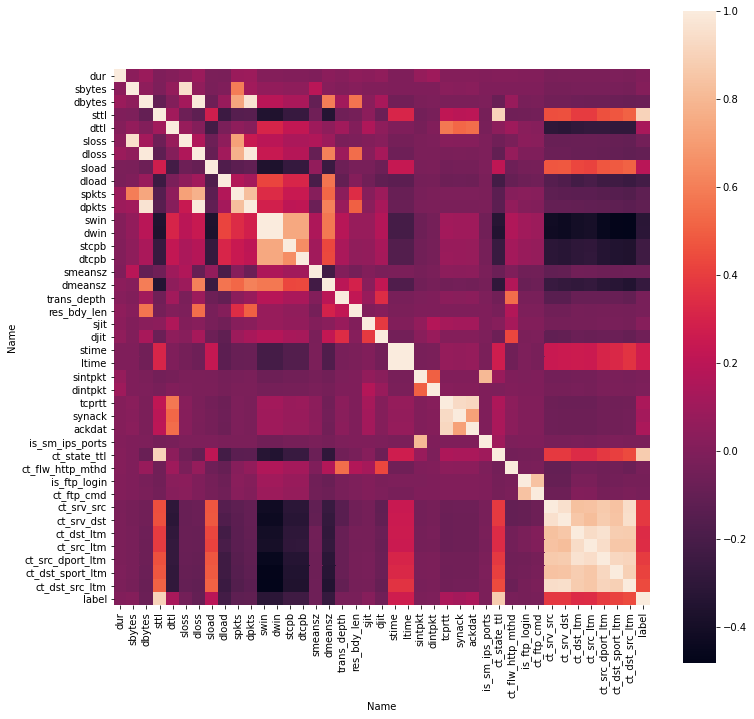

In [ ]:
# Plotting the correlation matrix of the dataset
# Refer: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

method = "pearson"
# correlation matrix
corr_mat = train.corr(method=method)

plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()

In [ ]:
# Getting and printing high correlated features
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")


sbytes               sloss                0.9515464133719798
dbytes               dloss                0.9912941785195651
dbytes               dpkts                0.970574471897777
sttl                 ct_state_ttl         0.9058027624492618
sttl                 label                0.9043459910420215
dloss                dpkts                0.992174391678671
swin                 dwin                 0.997193335953764
stime                ltime                0.9999999998072365
tcprtt               synack               0.9332414134718279
tcprtt               ackdat               0.9202047490192118
ct_srv_src           ct_srv_dst           0.9567210269496814
ct_srv_src           ct_dst_src_ltm       0.9421487110654678
ct_srv_dst           ct_dst_src_ltm       0.9510250539982371
ct_dst_ltm           ct_src_ltm           0.9384612565146037
ct_dst_ltm           ct_src_dport_ltm     0.9601144948768523
ct_src_ltm           ct_src_dport_ltm     0.9453045008386668
ct_src_dport_ltm     ct_dst

Most correlated features are:
* sbytes, sloss
* dpkts, dbytes, dloss
* sttl, ct_state_ttl, label
* swin, dwin
* stime, dtime
* tcprtt, synack, ackdat
* ct_srv_src, ct_dst_src_ltm, ct_srv_dst
* ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm



## Pairplots of highly correlated features

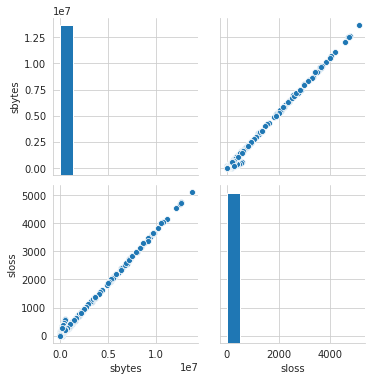

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['sbytes', 'sloss'])
plt.show()

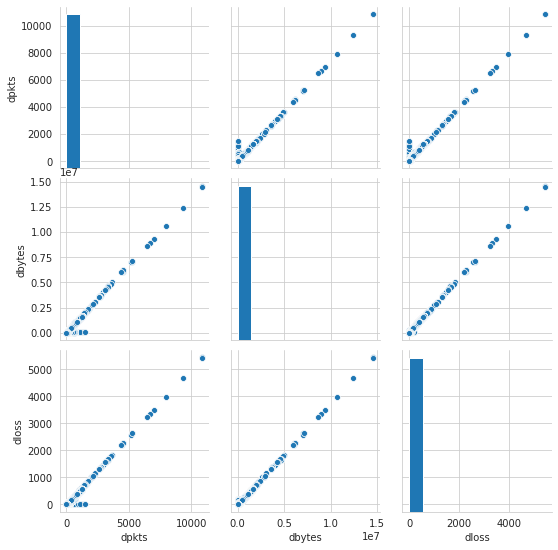

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['dpkts', 'dbytes', 'dloss'])
plt.show()

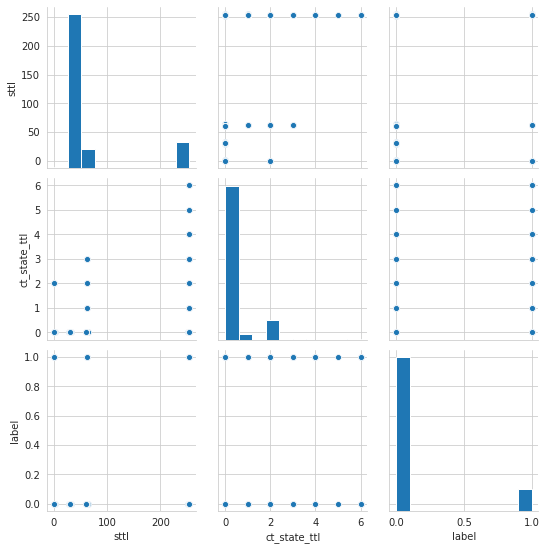

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['sttl', 'ct_state_ttl', 'label'])
plt.show()

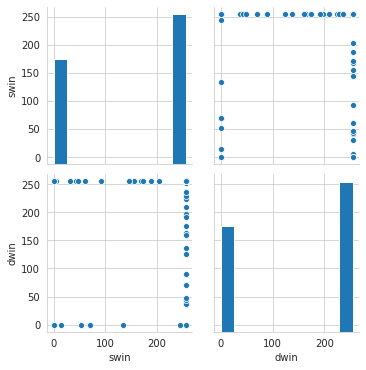

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['swin', 'dwin'])
plt.show()

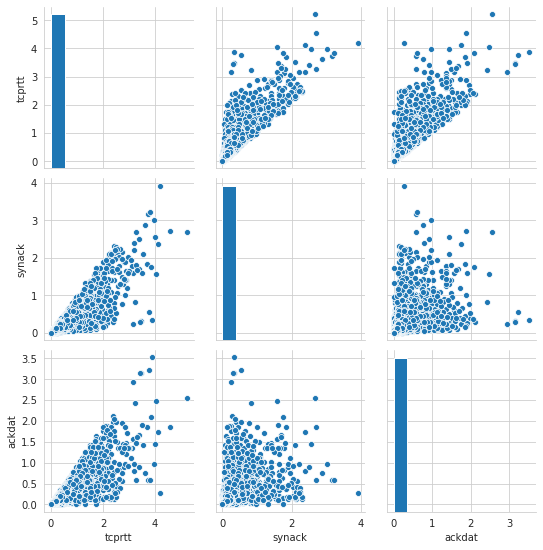

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['tcprtt', 'synack', 'ackdat'])
plt.show()

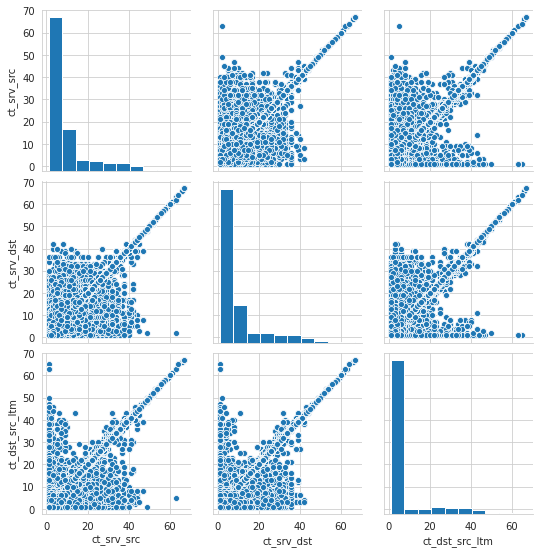

In [ ]:
sns.pairplot(train, vars=['ct_srv_src', 'ct_srv_dst', 'ct_dst_src_ltm'])
plt.show()

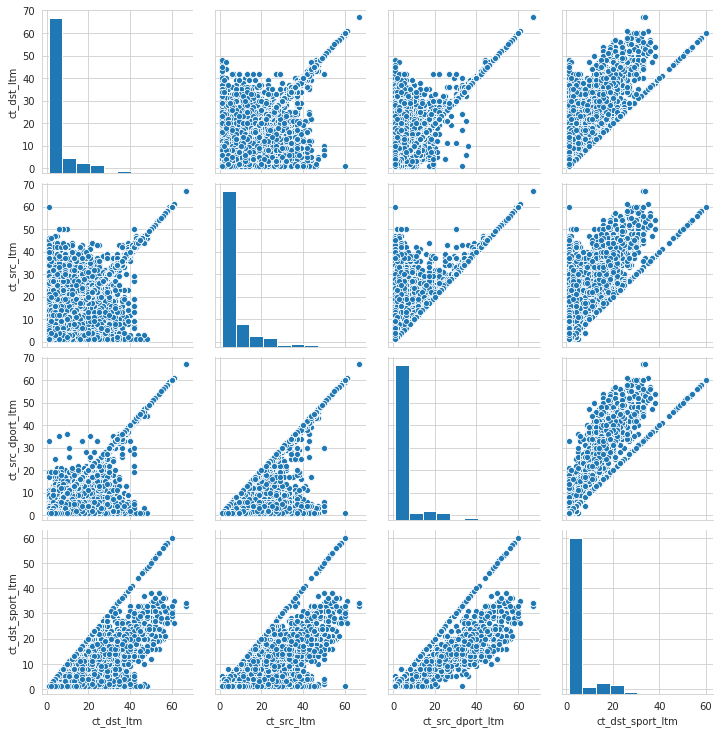

In [ ]:
sns.pairplot(train, vars=['ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm'])
plt.show()

### Countplots and pdf of features

In [ ]:
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Plotting pdf of numerical columns
# Refer: https://www.kaggle.com/khairulislam/unsw-nb15-eda

def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

In [ ]:
def reduce_column(s, to_keep):
    """
    This function reduce categorical values of a given feature to values provided in to_keep list
    and make every other value "others"
    """
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

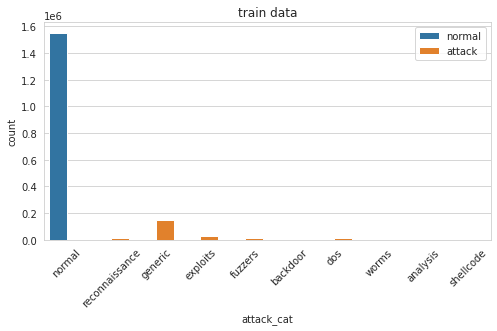

In [ ]:
col_countplot('attack_cat')

In [ ]:
train['proto'].nunique()

135

In [ ]:
normal['proto'].nunique(), anomaly['proto'].nunique()

(9, 129)

In [ ]:
train['proto'].value_counts().head(10)*100/train.shape[0]

tcp     58.858108
udp     38.983550
unas     0.639640
arp      0.397631
ospf     0.306800
sctp     0.061810
icmp     0.020303
any      0.015916
gre      0.013104
ipv6     0.011642
Name: proto, dtype: float64

In [ ]:
to_keep = ['tcp', 'udp', 'unas', 'arp', 'ospf']
train['proto_reduced'] = train['proto'].apply(reduce_column, args=(to_keep,))

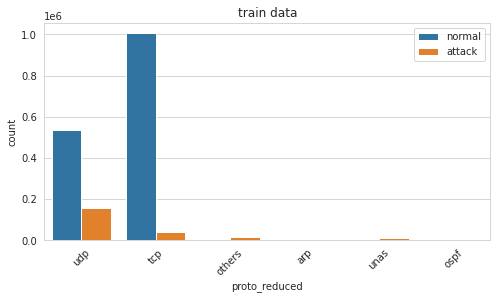

In [ ]:
col_countplot('proto_reduced')

In [ ]:
train['service'].nunique()

13

In [ ]:
train['service'].value_counts()

-           873215
dns         546631
http        144254
ftp-data     87930
smtp         57190
ftp          34393
ssh          32999
pop3          1078
dhcp           110
ssl            106
snmp            76
radius          28
irc             22
Name: service, dtype: int64

In [ ]:
to_keep = ['dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']
train['service_reduced'] = train['service'].apply(reduce_column, args=(to_keep,))

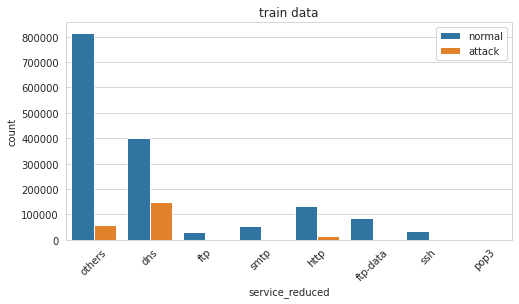

In [ ]:
col_countplot('service_reduced')

In [ ]:
train['state'].nunique()

16

In [ ]:
train['state'].value_counts()

FIN    1035786
CON     391628
INT     343372
REQ       6384
RST        346
ECO        246
CLO        114
URH         71
ACC         32
PAR         21
no           6
TXD          6
MAS          6
ECR          6
TST          4
URN          4
Name: state, dtype: int64

In [ ]:
to_keep = ['int', 'fin', 'con', 'req']
train['state_reduced'] = train['state'].apply(reduce_column, args=(to_keep,))

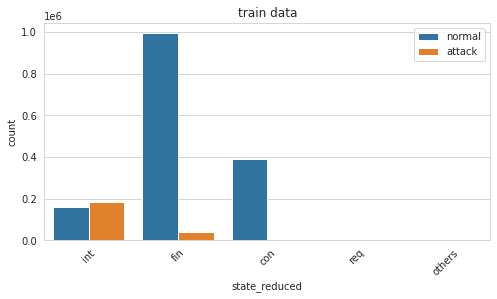

In [ ]:
col_countplot('state_reduced')

In [ ]:
train.drop(columns=['proto_reduced', 'state_reduced', 'service_reduced'], inplace=True)

In [ ]:
train.shape

(1778032, 49)

In [ ]:
col = 'ct_dst_ltm'
train[col].nunique()

62

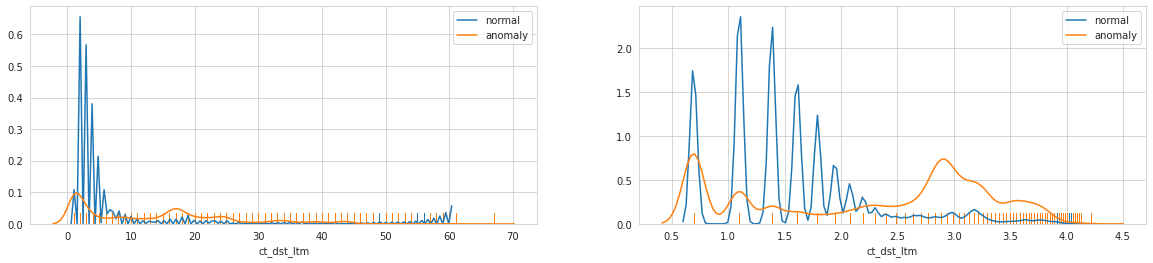

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['ct_flw_http_mthd'].nunique()

16

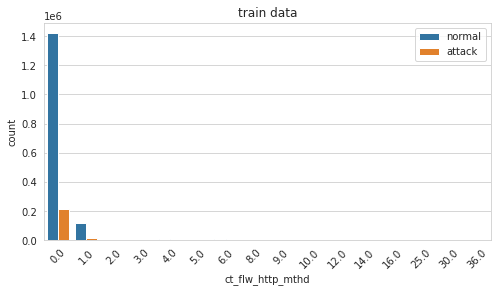

In [ ]:
col_countplot('ct_flw_http_mthd')

In [ ]:
col = 'ct_srv_src'
train[col].nunique()

65

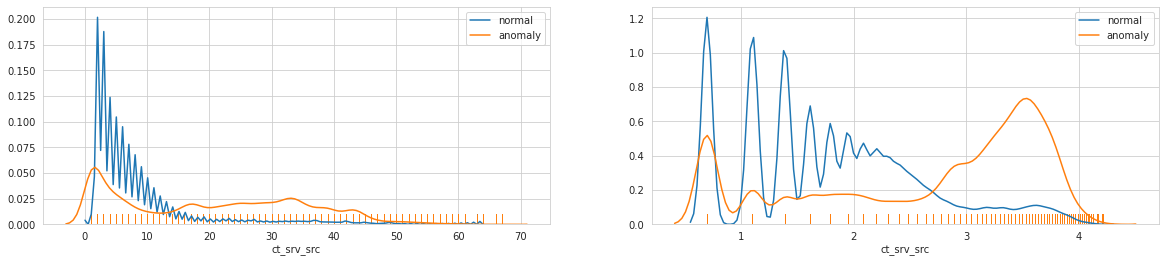

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['ct_state_ttl'].nunique()

7

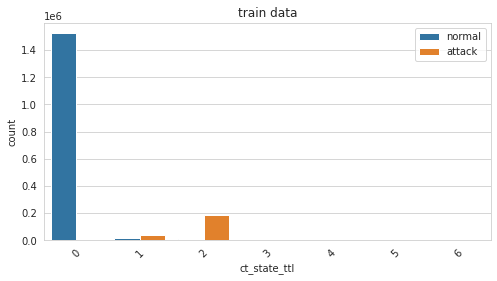

In [ ]:
col_countplot('ct_state_ttl')

#### ct_dst_sport_ltm

In [ ]:
train['ct_dst_sport_ltm'].nunique()

55

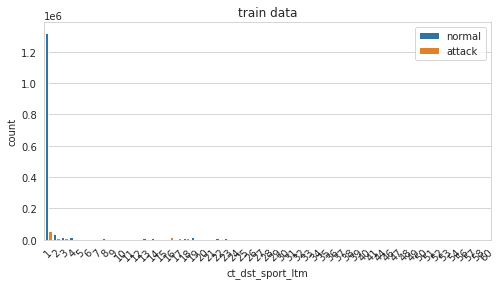

In [ ]:
col_countplot('ct_dst_sport_ltm')

In [ ]:
train['dintpkt'].nunique()

719690

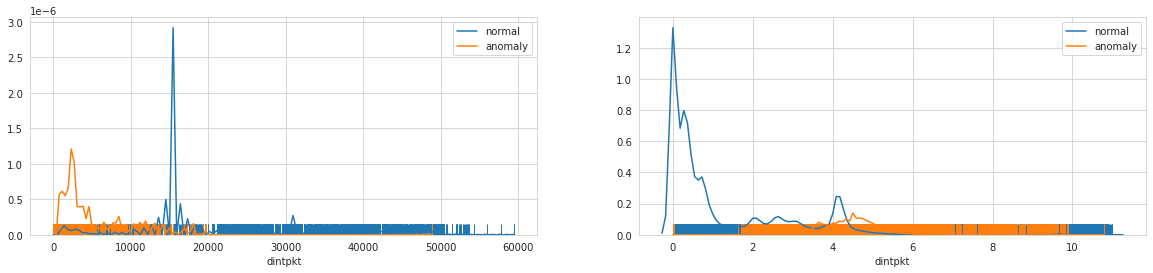

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dintpkt')
plt.subplot(122)
dual_plot('dintpkt', method=np.log1p)
plt.show()

In [ ]:

train['djit'].nunique()

1013756

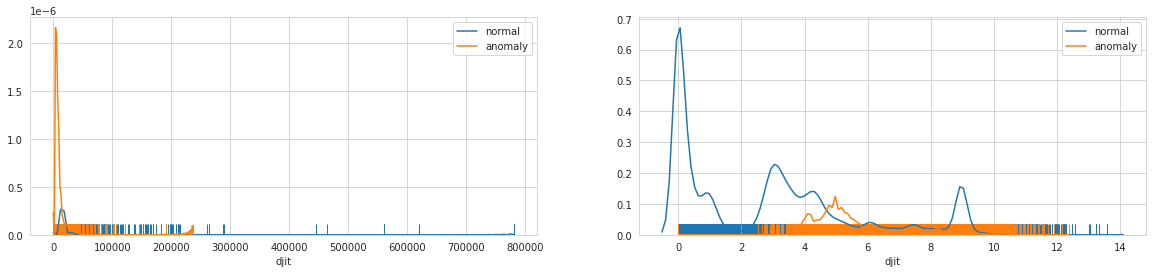

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('djit')
plt.subplot(122)
dual_plot('djit', method=np.log1p)
plt.show()

In [ ]:
train['dload'].nunique()

857308

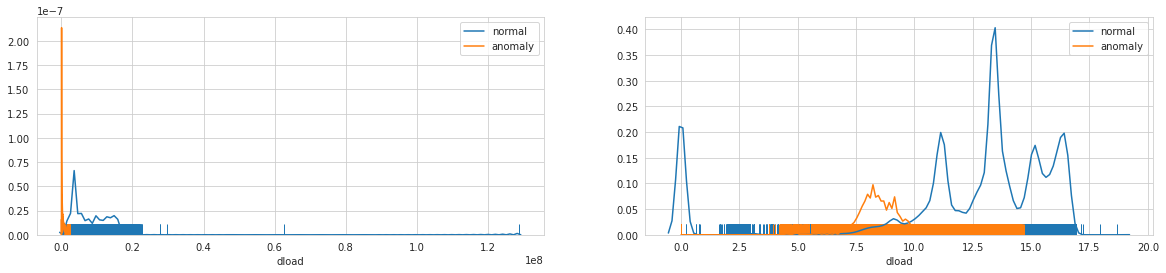

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dload')
plt.subplot(122)
dual_plot('dload', method=np.log1p)
plt.show()

In [ ]:
col = 'dbytes'
train[col].nunique()

15519

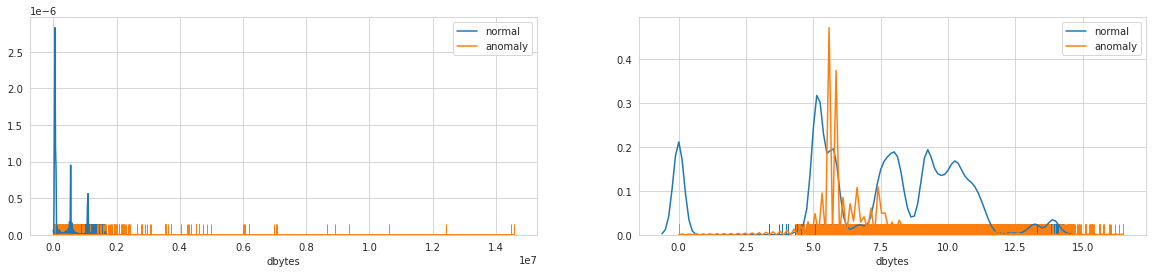

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
col = 'dmeansz'
train[col].nunique()

1408

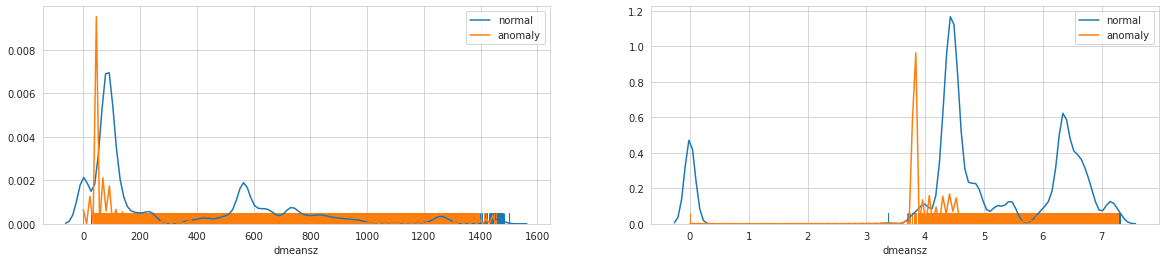

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['dpkts'].nunique()

443

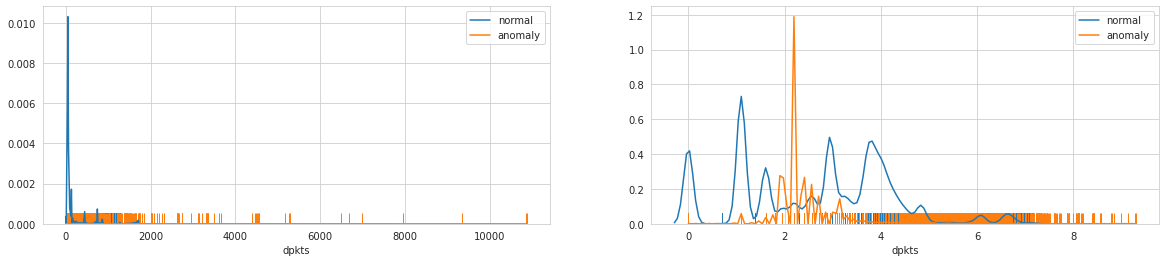

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dpkts')
plt.subplot(122)
dual_plot('dpkts', method=np.log1p)
plt.show()

In [ ]:
col = 'dtcpb'
train[col].nunique()

1006615

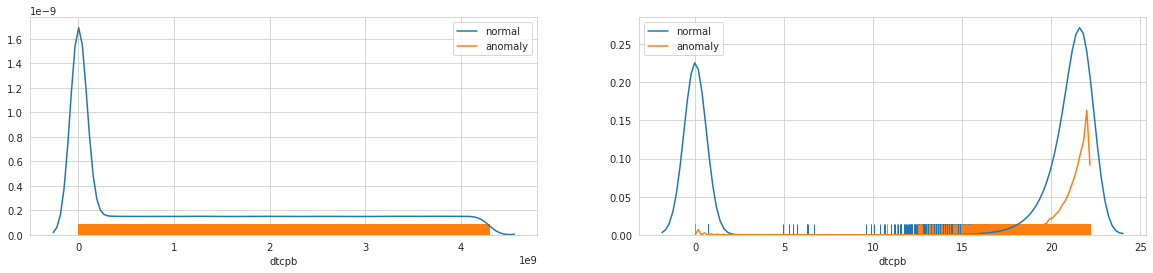

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['dttl'].nunique()

11

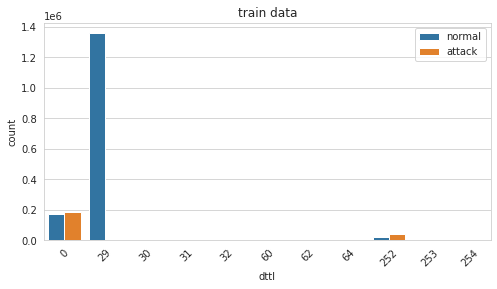

In [ ]:
col_countplot('dttl')

In [ ]:
col = 'dur'
train[col].nunique()

458708

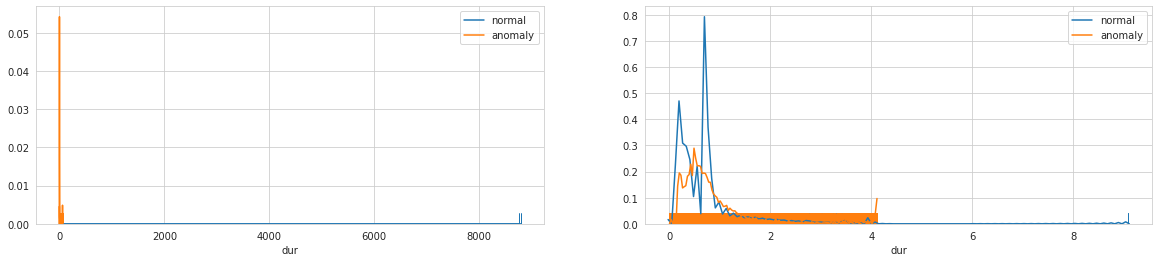

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['sintpkt'].nunique()

728686

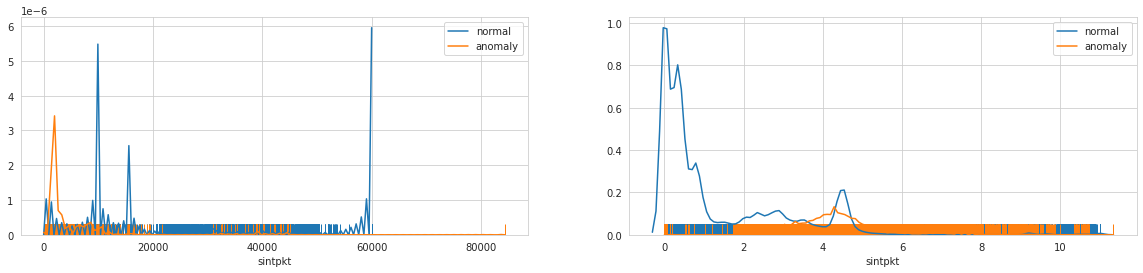

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('sintpkt')
plt.subplot(122)
dual_plot('sintpkt', method=np.log1p)
plt.show()

In [ ]:
train['sttl'].nunique()

13

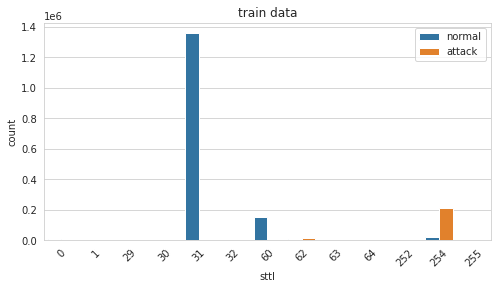

In [ ]:
col_countplot("sttl")

In [ ]:
col = 'stcpb'
train[col].nunique()

1007023

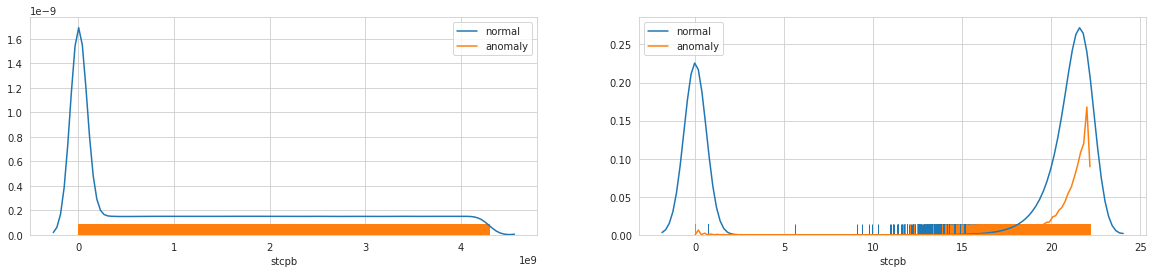

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['swin'].nunique()

22

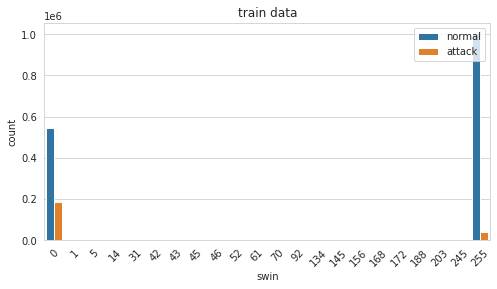

In [ ]:
col_countplot('swin')

In [ ]:
col = 'sbytes'
train[col].nunique()

11619

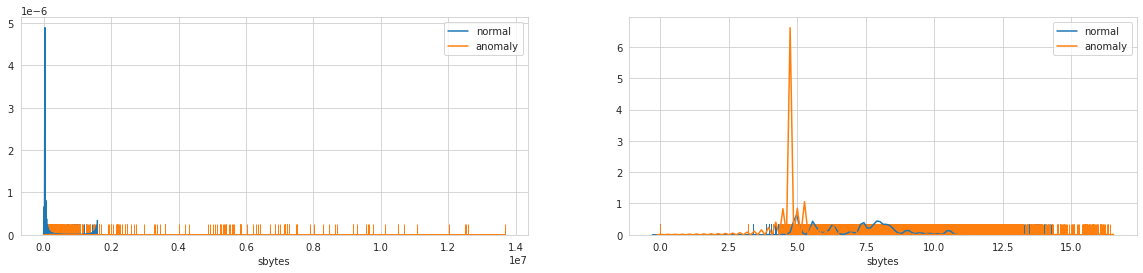

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()